In [423]:

import matplotlib.pyplot as plt
import pickle
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.cm as cmx


# load data

In [424]:
def calc_taunn(krel,krec,bet):

     return 1/(krec+krel*bet)

In [425]:


# filepath = sys.argv[1]
stim_type = 'smooth'
# param = sys.argv[3]
# val = sys.argv[4]
# par = f'{param}_{val}'

net = 'Reciporcal_mono_linear_heavy_maxan_equalweight/noGCGainControl'

# load dataframe 
response_data = pd.read_csv(f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/responses_RG_nAB_wBAfixed_long.csv')


# load dataframe 
df = pd.read_csv(f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/anticipation_data_nAB_wBAfixed_long.csv')


print(df.columns)

# calculate anticipation with respect to V_drive
df['ant_RG_drive_time']  =  df['peak_drive'] - df['peak_RG'] 
df['ant_RG_drive_space'] = df['ant_RG_drive_time']* df['speed']

# calculate anticipation with respect to 
df['ant_RG_bar_time']  = df['tp_rf_GC_mid'] - df['peak_RG'] 
df['ant_RG_bar_space'] = df['ant_RG_bar_time']* df['speed']


df['taunB'] = calc_taunn(0.1,0.1,df['betaB'])
df['taunAr']= df['taunA'].round(3)
df['taunBr']= df['taunB'].round(3)
# multiple heatmaps, keeping w+ fixed and changing w-
#dfgrouped = df.groupby(['wAB'])


speeds = df['speed'].unique()#[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0]





Index(['Unnamed: 0', 'wBA', 'wAB', 'tauA', 'tauB', 'speed', 'peak_RG',
       'peak_RB', 'peak_drive', 'tp_rf_GC_mid', 'peak_RG_pooling',
       'peak_RB_pooling', 'onset_RB', 'onset_RG', 'betaA', 'betaB', 'krecA',
       'krecB', 'krelA', 'krelB', 'neqA', 'neqB', 'nminA', 'nminB',
       'onset_RB_pooling', 'onset_RG_pooling', 'taunA', 'taunB'],
      dtype='object')


In [426]:
speeds

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1. , 2. ])

In [427]:
#load params 
fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/params_grid'
            
with open(fp, 'rb') as handle:
    paramsi = pickle.load(handle)

    for key in paramsi.keys():
        print(f'{key}')
        print(paramsi[key])

nb_cells
300
nb_GC_cells
300
saving_range
50
rf_BC
0.30000000000000004
rf_BC_s
1.2000000000000002
rf_GC
0.39
rf_GC_s
2.91
std_GC
0.065
std_GC_s
0.48500000000000004
speed
1.0
spacing
0.005
dt
0.001
stimulus_polarity
1
stop_pos
None
w_BC
0.4
w_GC
0.0
X0
0
tauA
0.28
tauA2
0.3
tauB
0.008
tauG
0.01
tauOPL
0.04
tauOPL2
0.0876
SF
0.0
input_scale
0.1
wAB
46.0
wBA
46.0
wA2B
46.0
wA2A
0
wAA2
0.0
wBA2
16.0
wGB
0.04
wGA
0.0
wGA2
0.0
d
1
rectification_BC
True
slope_BC
1
threshold_BC
0
rectification_AC
True
slope_GC
1110
threshold_GC
0.0
rectification_n
True
slope_n
1
threshold_n
0.0
plastic_to_G
True
plastic_to_A
False
krecB
1.0
krelB
0.5
betaB
0.0
krecA
0.5
krelA
1.0
betaA
1.0
krecA2
0.1
krelA2
0.1
betaA2
0.0
tauActB
0.12
hB
0
tauActA
0.1
hA
0.0
tauActG
0.1995
hG
0.0
distance
1.5
duration
1.5
rf_overlap
60.20000000000001
cell_spacing
0.0049833887043189366
tps
1500
std
0.05000000000000001
roh
0.026666666666666665
pos_rf_mid
[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0

In [428]:
# load reference net with no plasticity 

data = {}
cell = 150

nets_list = ['Reciporcal_mono_linear_heavy_maxan_equalweight/noGCGainControl/wBA/wBA_46.0',
             'Reciporcal_mono_linear_heavy_maxan_equalweight/noGCGainControl/wBA/wBA_0.0']

for net in nets_list:
    
    data[net] = {}

    bars = []
    tps_rf_GC_mid = []
    times = []

    Fs = []
    RBs = []
    RGs = []
    OBs = []
    OAs = []

    peaks_RG = []
    peaks_RB = []
    peaks_drive = []

    ants_RB_drive = []
    ants_RB_bar = []

    ants_RG_drive = []
    ants_RG_bar = []

    omins_B = []
    omins_A = []

    for s in speeds: 
        fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/smooth_{s}'
        with open(f'{fp}/out', 'rb') as handle:
            out = pickle.load(handle)    
            
        with open(f'{fp}/params', 'rb') as handle:
            paramsi = pickle.load(handle)
            
        duration = paramsi['duration']
        dt = paramsi['dt']
        time = np.arange(0,duration,dt) #- (paramsi['spacing']*cell)/paramsi['speed']#*1000#+45
        pos_cell = paramsi['pos_rf_GC_mid'][cell]
        #barr = [bar(t,pos_cell, v = s) for t in time]
        tp_bar = paramsi['tps_rf_GC_mid'][cell]

        peak_RB = time[np.argmax(out['RB'][50,:])]
        peak_RG = time[np.argmax(out['RG'][:])]
        peak_drive = time[np.argmax(out['F'][:])]

        omin_B = np.min(out['OB'][50,:])
        omin_A = np.min(out['OA'][50,:])


        # RAM
        ant_RB_drive =  peak_drive - peak_RB
        ant_RB_bar  =  tp_bar - peak_RB

        ant_RG_drive =  peak_drive - peak_RG
        ant_RG_bar =  tp_bar - peak_RG

        #bars.append(barr)
        tps_rf_GC_mid.append(tp_bar)
        times.append(time)

        Fs.append(out['F'])
        RBs.append(out['RB'][50,:])
        RGs.append(out['RG'])
        OBs.append(out['OB'][50,:])
        OAs.append(out['OA'][50,:])

        peaks_RB.append(peak_RB)
        peaks_RG.append(peak_RG)
        peaks_drive.append(peak_drive)

        ants_RB_drive.append(ant_RB_drive)
        ants_RB_bar.append(ant_RB_bar)
        
        ants_RG_drive.append(ant_RG_drive)
        ants_RG_bar.append(ant_RG_bar)

        omins_B.append(omin_B)
        omins_A.append(omin_A)


    data[net]['peaks']={}
    data[net]['peaks']['RB'] = np.asarray(peaks_RB)
    data[net]['peaks']['RG'] = np.asarray(peaks_RG)
    data[net]['peaks']['drive'] =np.asarray( peaks_drive)

    data[net]['omin'] = {}
    data[net]['omin']['B'] = np.asarray(omins_B)
    data[net]['omin']['A'] = np.asarray(omins_A)

    data[net]['ants'] ={}
    data[net]['ants']['RB_drive'] =np.asarray(ants_RB_drive)
    data[net]['ants']['RB_bar'] =np.asarray(ants_RB_bar)
    data[net]['ants']['RG_drive'] =np.asarray(ants_RG_drive)
    data[net]['ants']['RG_bar'] =np.asarray(ants_RG_bar)
    
    data[net]['RB'] = RBs
    data[net]['RG'] = RGs
    data[net]['F'] = Fs
    data[net]['OB'] = OBs
    data[net]['OA'] = OAs

    data['bars'] = bars
    data['tps_rf_mid'] = np.asarray(tps_rf_GC_mid)
    data['times'] = times


net_AC = nets_list[0]
net_pool = nets_list[1]

In [429]:
# load example network with and without plasticity

data = {}
cell = 150

nets_list = ['Reciporcal_mono_linear_plastic_opt/noGCGainControl/betaA/betaA_0.04',
             'Reciporcal_mono_linear_plastic_opt/noGCGainControl/only_one_plasticity/betaB/betaB_0.0',
             'Reciporcal_mono_linear_plastic_opt/noGCGainControl/only_one_plasticity/betaB/betaB_0.6',
             'Reciporcal_mono_linear_plastic_opt/noGCGainControl/only_one_plasticity/betaA/betaA_0.04']

for net in nets_list:
    
    data[net] = {}

    bars = []
    tps_rf_GC_mid = []
    times = []

    Fs = []
    RBs = []
    RAs = []
    RGs = []
    OBs = []
    OAs = []

    peaks_RG = []
    peaks_RB = []
    peaks_drive = []

    amps_RB = []
    amps_RA = []
    amps_RG = []
    amps_drive = []

    ants_RB_drive = []
    ants_RB_bar = []

    ants_RG_drive = []
    ants_RG_bar = []

    omins_B = []
    omins_A = []

    for s in speeds: 
        fp = f'/user/sebert/home/Documents/Simulations/motion/anticipation_1D/Reciporcal/{net}/smooth_{s}'
        with open(f'{fp}/out', 'rb') as handle:
            out = pickle.load(handle)    
            
        with open(f'{fp}/params', 'rb') as handle:
            paramsi = pickle.load(handle)
            
        duration = paramsi['duration']
        dt = paramsi['dt']
        time = np.arange(0,duration,dt) #- (paramsi['spacing']*cell)/paramsi['speed']#*1000#+45
        pos_cell = paramsi['pos_rf_GC_mid'][cell]
        #barr = [bar(t,pos_cell, v = s) for t in time]
        tp_bar = paramsi['tps_rf_GC_mid'][cell]

        peak_RB = time[np.argmax(out['RB'][50,:])]
        peak_RG = time[np.argmax(out['RG'][:])]
        peak_drive = time[np.argmax(out['F'][:])]

        amp_RB = np.max(out['RB'][50,:])
        amp_RA = np.max(out['RA'][50,:])
        amp_RG = np.max(out['RG'][:])
        amp_drive = np.max(out['F'][:])

        omin_B = np.min(out['OB'][50,:])
        omin_A = np.min(out['OA'][50,:])


        # RAM
        ant_RB_drive =  peak_drive - peak_RB
        ant_RB_bar  =  tp_bar - peak_RB

        ant_RG_drive =  peak_drive - peak_RG
        ant_RG_bar =  tp_bar - peak_RG

        #bars.append(barr)
        tps_rf_GC_mid.append(tp_bar)
        times.append(time)

        Fs.append(out['F'])
        RBs.append(out['RB'][50,:])
        RAs.append(out['RA'][50,:])
        RGs.append(out['RG'])
        OBs.append(out['OB'][50,:])
        OAs.append(out['OA'][50,:])

        peaks_RB.append(peak_RB)
        peaks_RG.append(peak_RG)
        peaks_drive.append(peak_drive)

        amps_RB.append(amp_RB)
        amps_RA.append(amp_RA)
        amps_RG.append(amp_RG)
        amps_drive.append(amp_drive)

        ants_RB_drive.append(ant_RB_drive)
        ants_RB_bar.append(ant_RB_bar)
        
        ants_RG_drive.append(ant_RG_drive)
        ants_RG_bar.append(ant_RG_bar)

        omins_B.append(omin_B)
        omins_A.append(omin_A)

        # get amplitudes 


    data[net]['peaks']={}
    data[net]['peaks']['RB'] = np.asarray(peaks_RB)
    data[net]['peaks']['RG'] = np.asarray(peaks_RG)
    data[net]['peaks']['drive'] =np.asarray( peaks_drive)

    data[net]['amps']={}
    data[net]['amps']['RB'] = np.asarray(amps_RB)
    data[net]['amps']['RA'] = np.asarray(amps_RA)
    data[net]['amps']['RG'] = np.asarray(amps_RG)
    data[net]['amps']['drive'] =np.asarray( amps_drive)
    
    data[net]['omin'] = {}
    data[net]['omin']['B'] = np.asarray(omins_B)
    data[net]['omin']['A'] = np.asarray(omins_A)

    data[net]['ants'] ={}
    data[net]['ants']['RB_drive'] =np.asarray(ants_RB_drive)
    data[net]['ants']['RB_bar'] =np.asarray(ants_RB_bar)
    data[net]['ants']['RG_drive'] =np.asarray(ants_RG_drive)
    data[net]['ants']['RG_bar'] =np.asarray(ants_RG_bar)
    
    data[net]['RB'] = RBs
    data[net]['RA'] = RAs
    data[net]['RG'] = RGs
    data[net]['F'] = Fs
    data[net]['OB'] = OBs
    data[net]['OA'] = OAs

    data['bars'] = bars
    data['tps_rf_mid'] = np.asarray(tps_rf_GC_mid)
    data['times'] = times


net_plastic = nets_list[0]
net_fixed = nets_list[1]
net_plasticB = nets_list[2]
net_plasticA = nets_list[3]

In [430]:
# calculate difference between anticipation with plasticiy 
# sp = df['speed'].values
# speeds = list(speeds)
# spidx = np.array([speeds.index(si) for si in sp]).astype(int)


# data[net_AC]['ants']['RG_bar']


# df['ant_diff_RG_bar_to_fixed'] = (df['ant_RG_bar_time'] -data[net_AC]['ants']['RG_bar'][spidx])*df['speed']


In [431]:
df['krecA'].unique()

array([1.])

In [432]:
df['betaB'].unique()

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.6 , 0.07, 0.08, 0.09, 0.1 , 0.2 ,
       0.3 , 0.4 , 0.5 , 0.7 , 0.8 , 0.9 , 1.  ])

# effect of taunB


In [433]:
val = 'betaA'
cNorm = colors.Normalize(vmin =df[val].min(), vmax = df[val].max())
cmap = plt.get_cmap('viridis', len(df[val].unique()))

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

In [434]:
var = 'ant_diff_RG_bar_to_fixed'
var = 'ant_RG_bar_space'

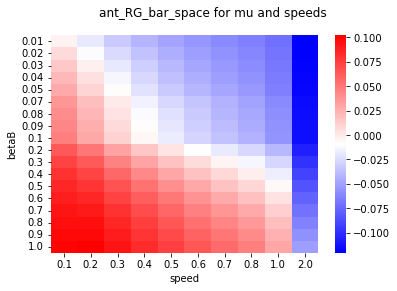

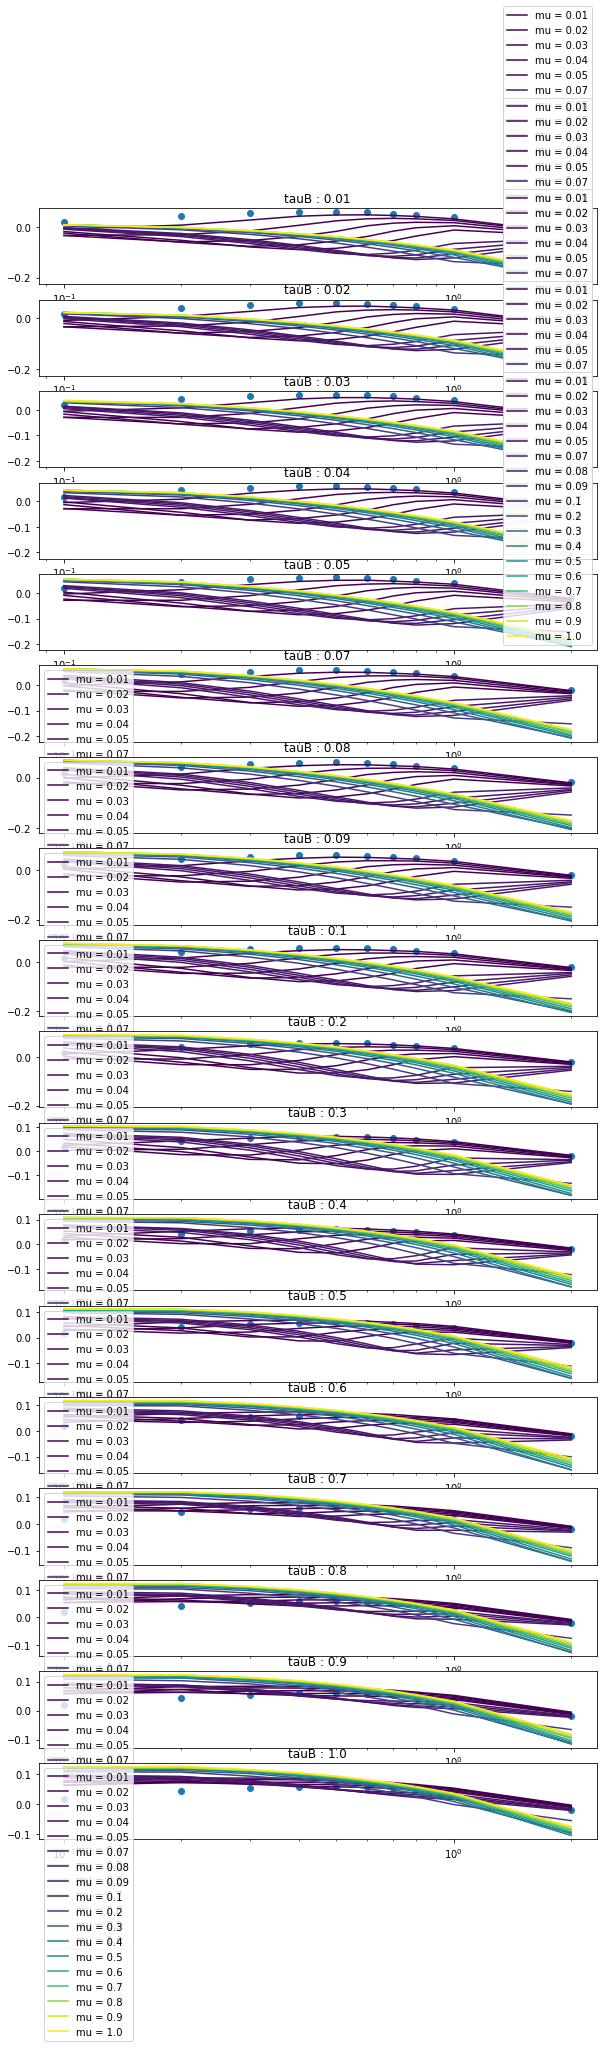

In [435]:
fig = plt.figure()
fig.tight_layout()
fig.suptitle(f'{var} for mu and speeds')


fig2 = plt.figure(figsize = (10,30))
fig2.tight_layout()
#weights = [0.0,10.0,50.0,100.0]

ax = fig.add_subplot(1,1,1)
# plot heatmap for beta
g_heatmap = df.pivot_table(index = 'betaB',columns = 'speed',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, ax = ax, cmap = 'bwr')#,  vmin=-0.2, vmax=0.2)

subg = df.groupby(['betaB'])

for x,w2 in enumerate(subg.groups):
    sg = subg.get_group(w2)
    subgg = sg.groupby([val])
    ax = fig2.add_subplot(len(subg.groups),1,x+1)
    ax.set_title(f'tauB : {w2}')
    ax.set_xscale('log')
    for t2 in subgg.groups :
        sgg = subgg.get_group(t2)
        ax.plot(sgg['speed'], sgg[var], label = f'mu = {t2}',color = scalarMap.to_rgba(t2))
    #sg.plot( x = 'speed', y = 'ant_RG_drive_space', label =f'wBA = {w2}', ax = ax)

    ax.scatter(speeds, data[net_fixed]['ants']['RG_bar']*speeds)
    #ax.scatter(speeds, data[net_pool]['ants']['RG_bar']*speeds)
    ax.legend()
#fig2.legend()


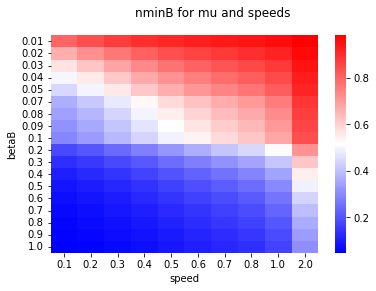

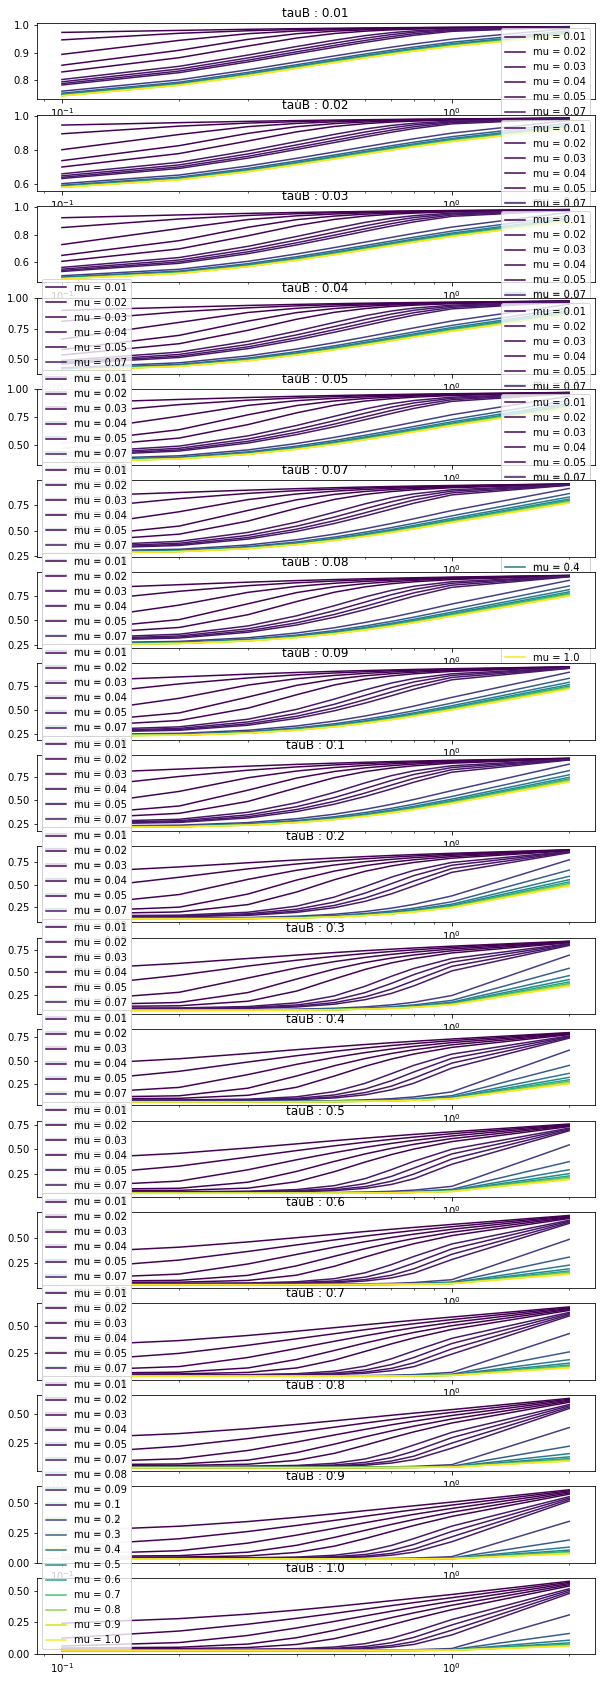

In [436]:
var = 'nminB'

fig = plt.figure()
fig.tight_layout()
fig.suptitle(f'{var} for mu and speeds')


fig2 = plt.figure(figsize = (10,30))
fig2.tight_layout()
#weights = [0.0,10.0,50.0,100.0]

ax = fig.add_subplot(1,1,1)
# plot heatmap for beta
g_heatmap = df.pivot_table(index = 'betaB',columns = 'speed',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, ax = ax, cmap = 'bwr')#,  vmin=-0.2, vmax=0.2)

subg = df.groupby(['betaB'])

for x,w2 in enumerate(subg.groups):
    sg = subg.get_group(w2)
    subgg = sg.groupby(['betaA'])
    ax = fig2.add_subplot(len(subg.groups),1,x+1)
    ax.set_title(f'tauB : {w2}')
    ax.set_xscale('log')
    for t2 in subgg.groups :
        sgg = subgg.get_group(t2)
        ax.plot(sgg['speed'], sgg[var], label = f'mu = {t2}',color = scalarMap.to_rgba(t2))
    #sg.plot( x = 'speed', y = 'ant_RG_drive_space', label =f'wBA = {w2}', ax = ax)

    # ax.scatter(speeds, data[net_AC]['ants']['RG_bar']*speeds)
    # ax.scatter(speeds, data[net_pool]['ants']['RG_bar']*speeds)
    ax.legend()
#fig2.legend()


# effect of taunA


In [437]:
var = 'ant_RG_bar_space'

In [438]:
cNorm = colors.Normalize(vmin =df['betaB'].min(), vmax = df['betaB'].max())
cmap = plt.get_cmap('viridis', len(df['betaB'].unique()))

scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

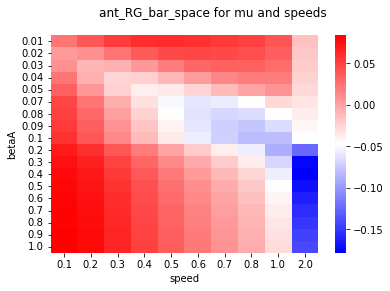

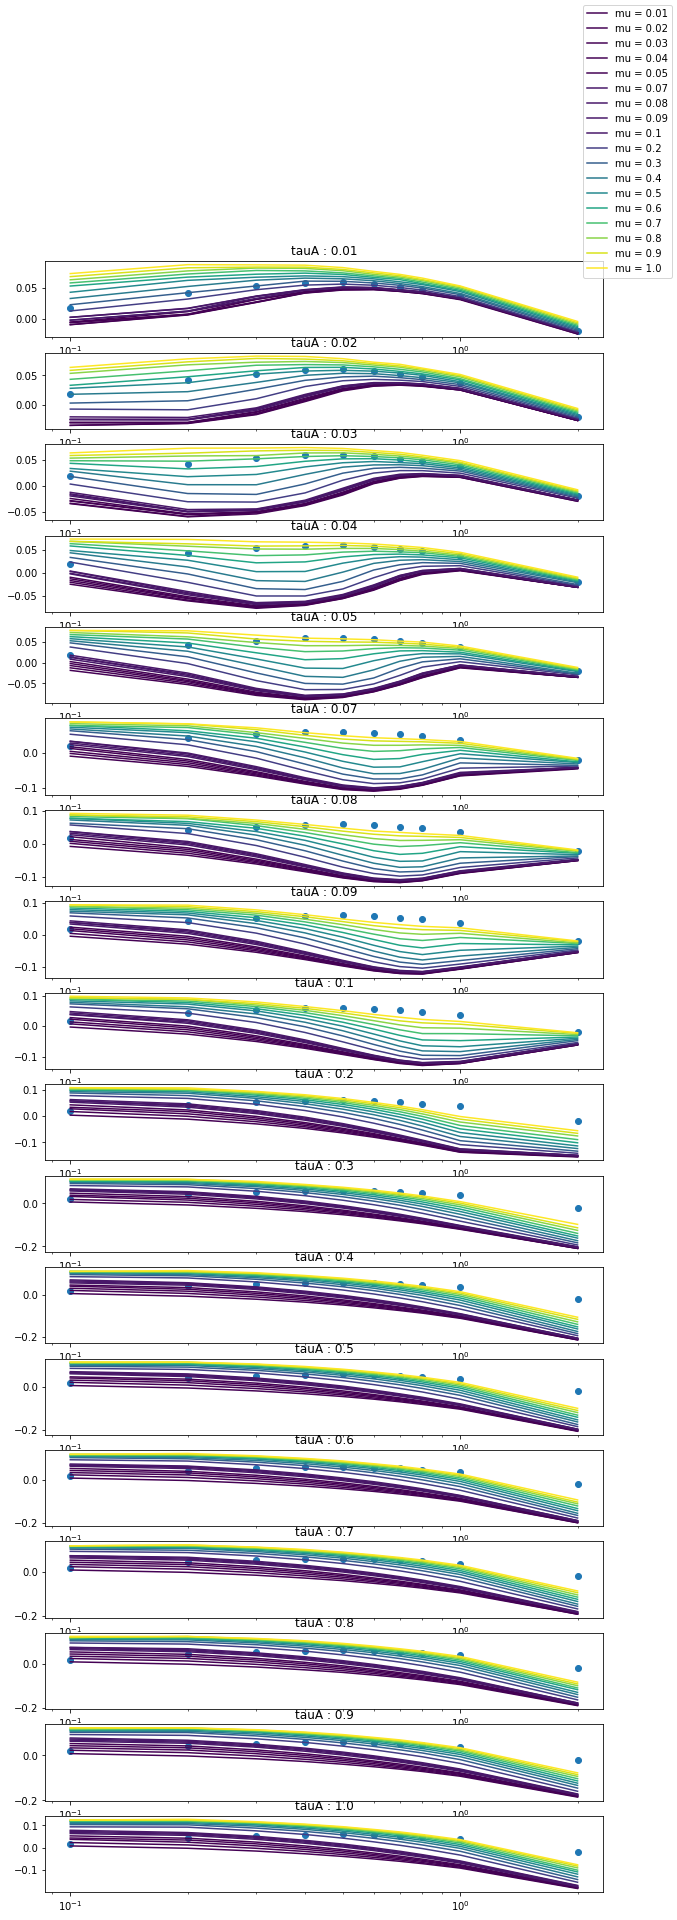

In [439]:
fig = plt.figure()
fig.tight_layout()
fig.suptitle(f'{var} for mu and speeds')


fig2 = plt.figure(figsize = (10,30))
fig2.tight_layout()
#weights = [0.0,10.0,50.0,100.0]

ax = fig.add_subplot(1,1,1)
# plot heatmap for beta
g_heatmap = df.pivot_table(index = 'betaA',columns = 'speed',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, ax = ax, cmap = 'bwr')#,  vmin=-0.2, vmax=0.2)

subg = df.groupby(['betaA'])
# get values for which difference across speed is minimal
diffsdf = pd.DataFrame(columns = ['diff', 'mu','wTOT','tauTOT', 'tauA', 'wBA'])


# get values that yield same anticipation time across speeds


   

for x,w2 in enumerate(subg.groups):
    sg = subg.get_group(w2)
    subgg = sg.groupby(['betaB'])
    ax = fig2.add_subplot(len(subg.groups),1,x+1)
    ax.set_title(f'tauA : {w2}')
    ax.set_xscale('log')
    for t2 in subgg.groups :
        sgg = subgg.get_group(t2)
        ax.plot(sgg['speed'], sgg[var], label = f'mu = {t2}',color = scalarMap.to_rgba(t2))
    #sg.plot( x = 'speed', y = 'ant_RG_drive_space', label =f'wBA = {w2}', ax = ax)

    ax.scatter(speeds, data[net_fixed]['ants']['RG_bar']*speeds)
    #ax.scatter(speeds, data[net_pool]['ants']['RG_bar']*speeds)

    if x == 0 :
        fig2.legend()

    sgg = sgg.query('speed != 2.0')

    diff = np.mean(np.abs(np.diff(sgg[var])))
    dat = {'diff': diff,
            'betaA' : sgg['betaA'],
            'betaB': sgg['betaB'],
            'taunAr': sgg['taunAr'],
            'taunBr':sg['taunBr']}
    diffsdf = diffsdf.append(dat, ignore_index = True)
#fig2.legend()


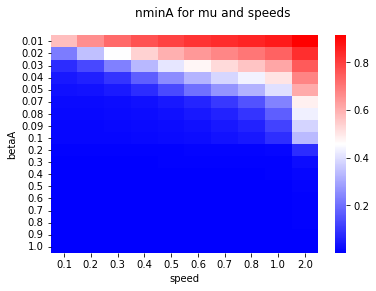

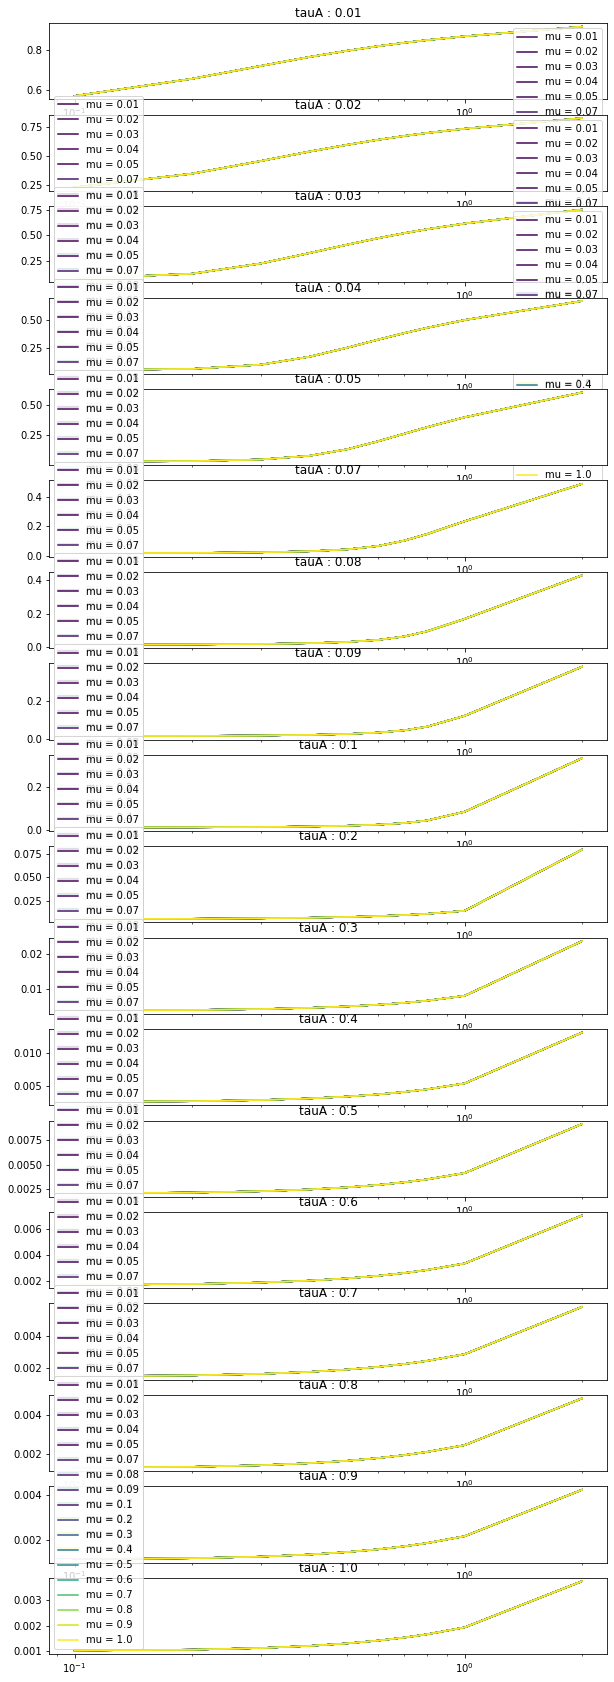

In [440]:
var = 'nminA'

fig = plt.figure()
fig.tight_layout()
fig.suptitle(f'{var} for mu and speeds')


fig2 = plt.figure(figsize = (10,30))
fig2.tight_layout()
#weights = [0.0,10.0,50.0,100.0]

ax = fig.add_subplot(1,1,1)
# plot heatmap for beta
g_heatmap = df.pivot_table(index = 'betaA',columns = 'speed',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, ax = ax, cmap = 'bwr')#,  vmin=-0.2, vmax=0.2)

subg = df.groupby(['betaA'])

for x,w2 in enumerate(subg.groups):
    sg = subg.get_group(w2)
    subgg = sg.groupby(['betaB'])
    ax = fig2.add_subplot(len(subg.groups),1,x+1)
    ax.set_title(f'tauA : {w2}')
    ax.set_xscale('log')
    for t2 in subgg.groups :
        sgg = subgg.get_group(t2)
        ax.plot(sgg['speed'], sgg[var], label = f'mu = {t2}',color = scalarMap.to_rgba(t2))
    #sg.plot( x = 'speed', y = 'ant_RG_drive_space', label =f'wBA = {w2}', ax = ax)

    # ax.scatter(speeds, data[net_AC]['ants']['RG_bar']*speeds)
    # ax.scatter(speeds, data[net_pool]['ants']['RG_bar']*speeds)
    ax.legend()
#fig2.legend()


Text(721.8235294117648, 0.5, '')

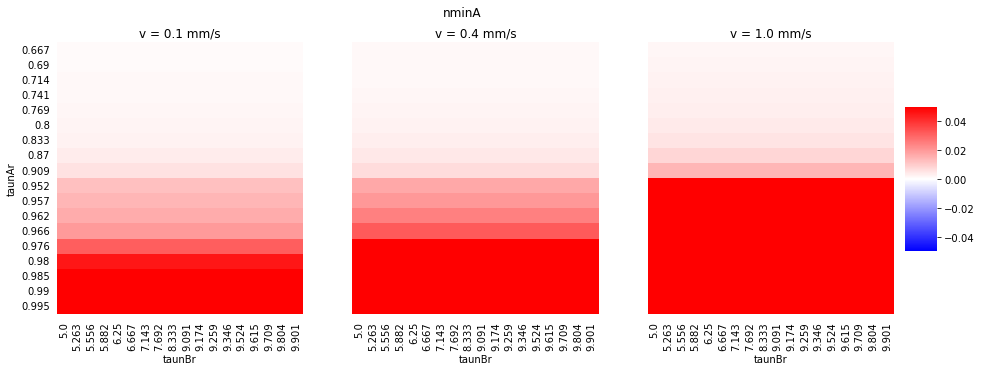

In [441]:

fig = plt.figure(figsize = (15,5))
fig.suptitle(f'{var}')

cbar_ax = fig.add_axes([.91, .3, .03, .4])

s = 0.1
ax = fig.add_subplot(131)
ax.set_title(f'v = {s} mm/s')
dfg = df.groupby('speed')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, cbar=None)
ax.tick_params(left=False, bottom=False)


s = 0.4
ax = fig.add_subplot(132)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)
# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, cbar=None, yticklabels=False)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')

s = 1.0
ax = fig.add_subplot(133)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-0.05, vmax=0.05, yticklabels=False, cbar_ax=cbar_ax)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')


Text(721.8235294117648, 0.5, '')

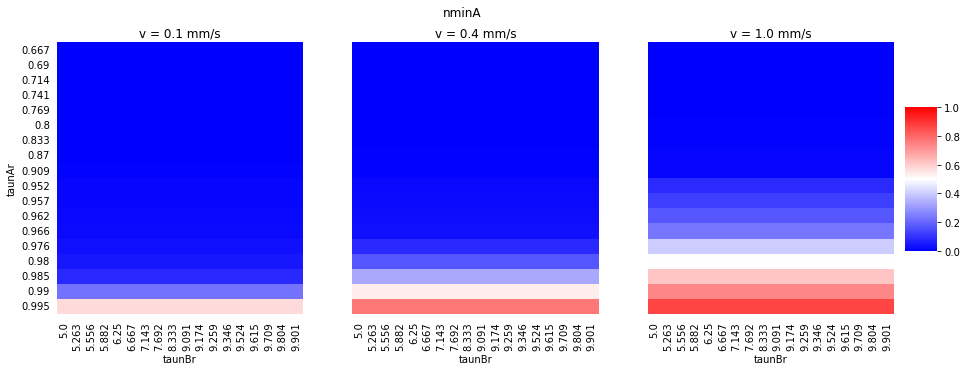

In [442]:
var = 'nminA'
fig = plt.figure(figsize = (15,5))
fig.suptitle(f'{var}')

cbar_ax = fig.add_axes([.91, .3, .03, .4])

s = 0.1
ax = fig.add_subplot(131)
ax.set_title(f'v = {s} mm/s')
dfg = df.groupby('speed')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=0.0, vmax=1, cbar=None)
ax.tick_params(left=False, bottom=False)


s = 0.4
ax = fig.add_subplot(132)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)
# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=0.0, vmax=1, cbar=None, yticklabels=False)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')

s = 1.0
ax = fig.add_subplot(133)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=0.0, vmax=1, yticklabels=False, cbar_ax=cbar_ax)
ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')


In [443]:
#winning values
betaB = 0.6
betaA = 0.03

plastic = df.query(f'betaA == {betaA} and betaB == {betaB}')
plastic2 = df.query(f'betaA == 0.04 and betaB == 1.0')
plastic3 = df.query(f'betaA == 0.04 and betaB == 0.6')

print(plastic['taunBr'])
print(plastic['taunAr'])

43      6.25
52      6.25
404     6.25
413     6.25
765     6.25
774     6.25
1126    6.25
1135    6.25
1487    6.25
1496    6.25
1848    6.25
1857    6.25
2209    6.25
2218    6.25
2570    6.25
2579    6.25
2931    6.25
2940    6.25
3292    6.25
3301    6.25
Name: taunBr, dtype: float64
43      0.985
52      0.985
404     0.985
413     0.985
765     0.985
774     0.985
1126    0.985
1135    0.985
1487    0.985
1496    0.985
1848    0.985
1857    0.985
2209    0.985
2218    0.985
2570    0.985
2579    0.985
2931    0.985
2940    0.985
3292    0.985
3301    0.985
Name: taunAr, dtype: float64


Text(721.8235294117648, 0.5, '')

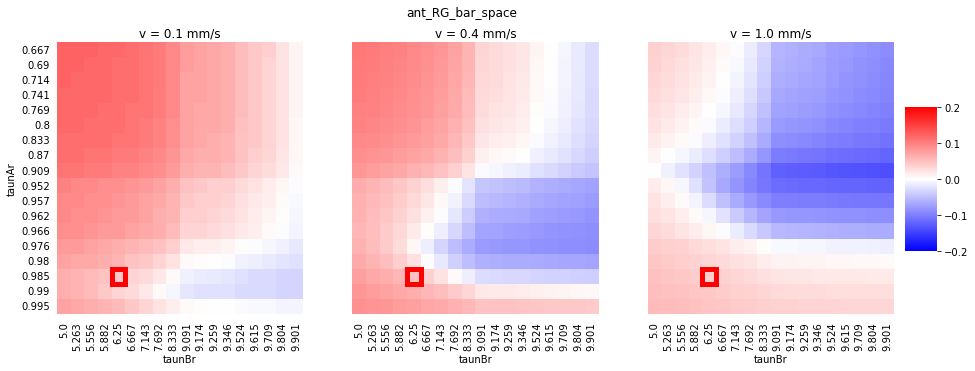

In [444]:
var = 'ant_RG_bar_space'
fig = plt.figure(figsize = (15,5))
fig.suptitle(f'{var}')

cbar_ax = fig.add_axes([.91, .3, .03, .4])

s = 0.1
ax = fig.add_subplot(131)
ax.set_title(f'v = {s} mm/s')
dfg = df.groupby('speed')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-.2, vmax=.2, cbar=None)

t = g_heatmap.columns == 6.25
col = t.nonzero()[0][0]

t = g_heatmap.index == 0.985
ind = t.nonzero()[0][0]
ax.add_patch(plt.Rectangle((col, ind), 1, 1, fc='none', ec='red', lw=5, clip_on=False))

ax.tick_params(left=False, bottom=False)


s = 0.4
ax = fig.add_subplot(132)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)
# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-.2, vmax=.2, cbar=None, yticklabels=False)

t = g_heatmap.columns == 6.25
col = t.nonzero()[0][0]

t = g_heatmap.index == 0.985
ind = t.nonzero()[0][0]
ax.add_patch(plt.Rectangle((col, ind), 1, 1, fc='none', ec='red', lw=5, clip_on=False))

ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')

s = 1.0
ax = fig.add_subplot(133)
ax.set_title(f'v = {s} mm/s')
dfs = dfg.get_group(s)

# plot heatmap for beta
g_heatmap = dfs.pivot_table(index = 'taunAr',columns = 'taunBr',values = var, aggfunc = 'mean')
sns.heatmap(g_heatmap, cmap = 'bwr', ax = ax,  vmin=-.2, vmax=.2, yticklabels=False, cbar_ax=cbar_ax)

t = g_heatmap.columns == 6.25
col = t.nonzero()[0][0]

t = g_heatmap.index == 0.985
ind = t.nonzero()[0][0]
ax.add_patch(plt.Rectangle((col, ind), 1, 1, fc='none', ec='red', lw=5, clip_on=False))



ax.tick_params(left=False, bottom=False)
ax.set_ylabel('')


In [445]:
diffsdf['diff']

0     0.006062
1     0.006213
2     0.004437
3     0.003612
4     0.004737
5     0.006987
6     0.008350
7     0.008987
8     0.010350
9     0.013725
10    0.013100
11    0.013087
12    0.011975
13    0.005871
14    0.012150
15    0.011337
16    0.011087
17    0.011813
Name: diff, dtype: float64

In [446]:
# combi with mimimal difference 

mi= diffsdf['diff'].argmin()
mibetaA = diffsdf['betaA'][mi]
mibetaB = diffsdf['betaB'][mi]
# sg = subg.get_group(mimu)
print(mibetaA,mibetaB)
# print(diffsdf.iloc[mi])
# ax.scatter(sg['speed'], sg[var], label = f'mu = {w2}',color = 'r', zorder = len(subg.groups))


75      0.04
436     0.04
797     0.04
1158    0.04
1519    0.04
1880    0.04
2241    0.04
2602    0.04
2963    0.04
Name: betaA, dtype: float64 75      1.0
436     1.0
797     1.0
1158    1.0
1519    1.0
1880    1.0
2241    1.0
2602    1.0
2963    1.0
Name: betaB, dtype: float64


In [345]:
#extract parameter for a given combination
t =df.query('taunBr == 9.901 and taunAr == 0.952')
params = [ 'krelA', 'betaA', 'krelB', 'betaB']
for p in params: 
    print(f'{p} = {t[p].mean()}')

krelA = 0.5
betaA = 0.1
krelB = 0.5
betaB = 0.009999999999999998


# final Plot

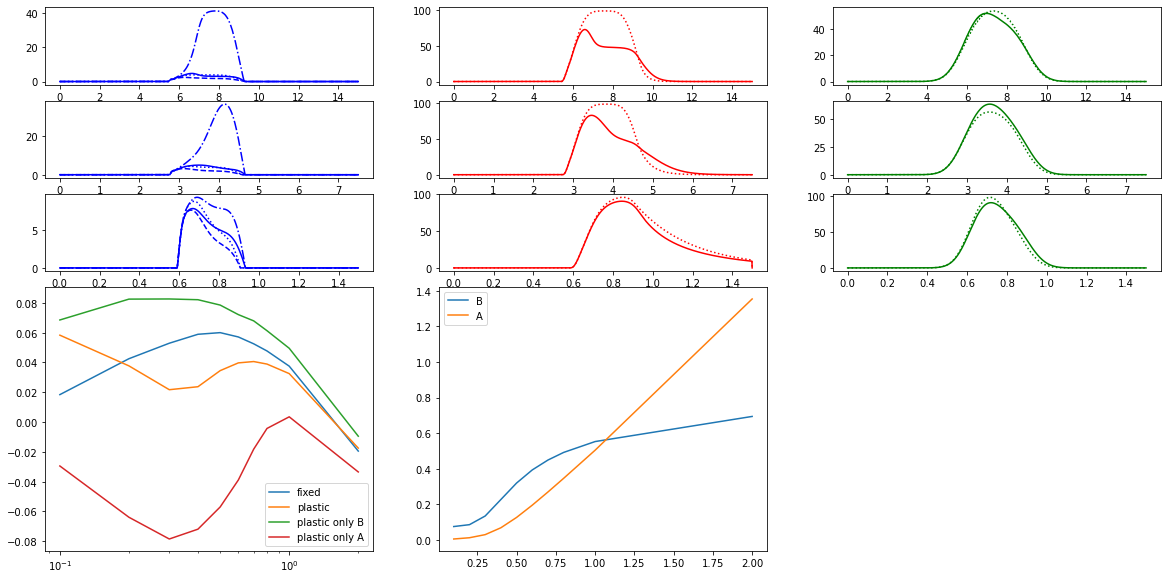

In [346]:
fig = plt.figure(figsize = (20,10))

gs = fig.add_gridspec(6,3)

ax = fig.add_subplot(gs[0,0])
x = 0
ax.plot(data['times'][x], data[net_fixed]['RB'][x], color = 'blue', linestyle = ':')
ax.plot(data['times'][x], data[net_plastic]['RB'][x], color = 'blue')
ax.plot(data['times'][x], data[net_plasticB]['RB'][x], color = 'blue',linestyle = '--')
ax.plot(data['times'][x], data[net_plasticA]['RB'][x], color = 'blue', linestyle = '-.')

ax = fig.add_subplot(gs[0,1])
x = 0
ax.plot(data['times'][x], data[net_fixed]['RA'][x], color = 'red', linestyle = ':')
ax.plot(data['times'][x], data[net_plastic]['RA'][x], color = 'red')


ax = fig.add_subplot(gs[0,2])
x = 0
ax.plot(data['times'][x], data[net_fixed]['RG'][x], color = 'green', linestyle = ':')
ax.plot(data['times'][x], data[net_plastic]['RG'][x], color = 'green')



ax = fig.add_subplot(gs[1,0])
x = 1
ax.plot(data['times'][x], data[net_fixed]['RB'][x], color = 'blue', linestyle = ':')
ax.plot(data['times'][x], data[net_plastic]['RB'][x], color = 'blue')
ax.plot(data['times'][x], data[net_plasticB]['RB'][x], color = 'blue',linestyle = '--')
ax.plot(data['times'][x], data[net_plasticA]['RB'][x], color = 'blue', linestyle = '-.')


ax = fig.add_subplot(gs[1,1])
ax.plot(data['times'][x], data[net_fixed]['RA'][x], color = 'red', linestyle = ':')
ax.plot(data['times'][x], data[net_plastic]['RA'][x], color = 'red')


ax = fig.add_subplot(gs[1,2])
ax.plot(data['times'][x], data[net_fixed]['RG'][x], color = 'green', linestyle = ':')
ax.plot(data['times'][x], data[net_plastic]['RG'][x], color = 'green')


ax = fig.add_subplot(gs[2,0])
x = -2
ax.plot(data['times'][x], data[net_fixed]['RB'][x], color = 'blue', linestyle = ':')
ax.plot(data['times'][x], data[net_plastic]['RB'][x], color = 'blue')
ax.plot(data['times'][x], data[net_plasticB]['RB'][x], color = 'blue',linestyle = '--')
ax.plot(data['times'][x], data[net_plasticA]['RB'][x], color = 'blue', linestyle = '-.')


ax = fig.add_subplot(gs[2,1])
ax.plot(data['times'][x], data[net_fixed]['RA'][x], color = 'red', linestyle = ':')
ax.plot(data['times'][x], data[net_plastic]['RA'][x], color = 'red')


ax = fig.add_subplot(gs[2,2])
ax.plot(data['times'][x], data[net_fixed]['RG'][x], color = 'green', linestyle = ':')
ax.plot(data['times'][x], data[net_plastic]['RG'][x], color = 'green')


ax = fig.add_subplot(gs[3:,0])
ax.plot(speeds, data[net_fixed]['ants']['RG_bar']*speeds, label = 'fixed')
ax.plot(speeds, data[net_plastic]['ants']['RG_bar']*speeds, label = 'plastic')
ax.plot(speeds, data[net_plasticB]['ants']['RG_bar']*speeds, label = 'plastic only B')
ax.plot(speeds, data[net_plasticA]['ants']['RG_bar']*speeds, label = 'plastic only A')
ax.set_xscale('log')
ax.legend()


ax = fig.add_subplot(gs[3:,1])
ax.plot(speeds, data[net_plastic]['omin']['B'], label = 'B')
ax.plot(speeds, data[net_plastic]['omin']['A']*speeds, label = 'A')
ax.legend()

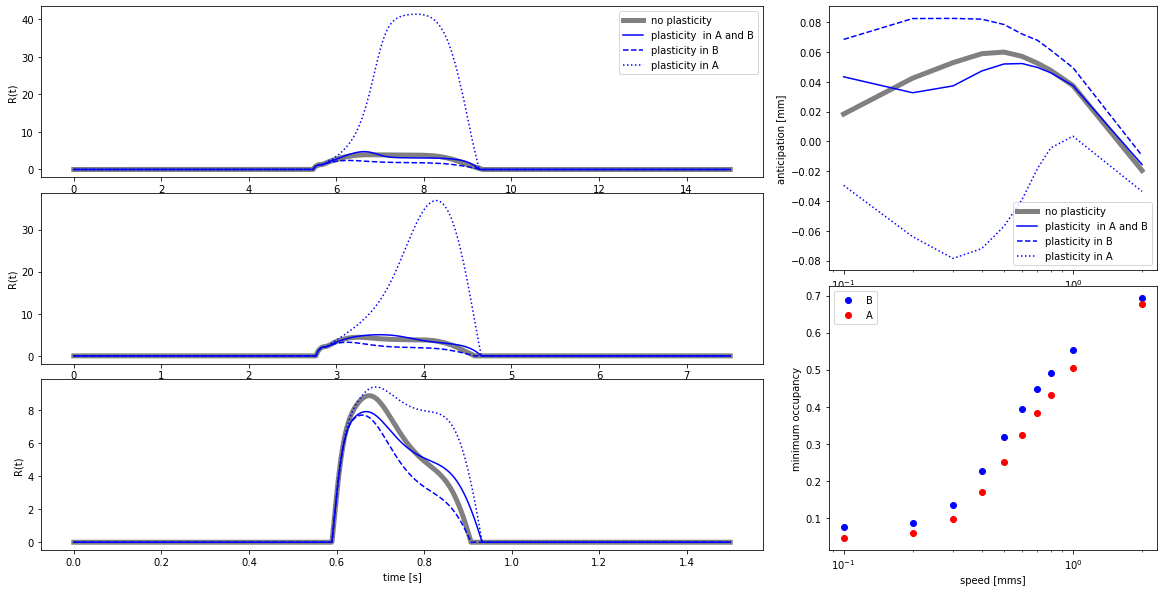

In [422]:



fig = plt.figure(figsize = (20,10))

gs = fig.add_gridspec(6,3)

ax = fig.add_subplot(gs[0:2,0:2])
x = 0
ax.plot(data['times'][x], data[net_fixed]['RB'][x], color = 'grey', linewidth = 5, linestyle = '-', label = 'no plasticity')
ax.plot(data['times'][x], data[net_plastic]['RB'][x], color = 'blue', linestyle = '-', label = 'plasticity  in A and B')
ax.plot(data['times'][x], data[net_plasticB]['RB'][x], color = 'blue',linestyle = '--', label = 'plasticity in B')
ax.plot(data['times'][x], data[net_plasticA]['RB'][x], color = 'blue', linestyle = ':', label = 'plasticity in A')
ax.legend()
ax.set_ylabel('R(t)')


ax = fig.add_subplot(gs[2:4,0:2])
x = 1
ax.plot(data['times'][x], data[net_fixed]['RB'][x],  color = 'grey', linewidth = 5, linestyle = '-')
ax.plot(data['times'][x], data[net_plastic]['RB'][x],  color = 'blue', linestyle = '-')
ax.plot(data['times'][x], data[net_plasticB]['RB'][x],  color = 'blue',linestyle = '--')
ax.plot(data['times'][x], data[net_plasticA]['RB'][x], color = 'blue', linestyle = ':')
ax.set_ylabel('R(t)')


ax = fig.add_subplot(gs[4:,0:2])
x = -2
ax.plot(data['times'][x], data[net_fixed]['RB'][x], color = 'grey', linewidth = 5, linestyle = '-')
ax.plot(data['times'][x], data[net_plastic]['RB'][x], color = 'blue', linestyle = '-')
ax.plot(data['times'][x], data[net_plasticB]['RB'][x], color = 'blue',linestyle = '--')
ax.plot(data['times'][x], data[net_plasticA]['RB'][x], color = 'blue', linestyle = ':')
ax.set_xlabel('time [s]')
ax.set_ylabel('R(t)')


ax = fig.add_subplot(gs[0:3,2])

# ax.plot(speeds, data[net_fixed]['ants']['RG_bar']*speeds,  color = 'grey', linewidth = 5, linestyle = '-', label = 'no plasticity')
# ax.plot(speeds, data[net_plastic]['ants']['RG_bar']*speeds,  color = 'blue', linestyle = '-', label = 'plasticity  in A and B')
# ax.plot(speeds, data[net_plasticB]['ants']['RG_bar']*speeds, color = 'blue',linestyle = '--', label = 'plasticity in B')
# ax.plot(speeds, data[net_plasticA]['ants']['RG_bar']*speeds, color = 'blue', linestyle = ':', label = 'plasticity in A')


ax.plot(speeds, data[net_fixed]['ants']['RG_bar']*speeds,  color = 'grey', linewidth = 5, linestyle = '-', label = 'no plasticity')
ax.plot(plastic['speed'], plastic['ant_RG_bar_space'],  color = 'blue', linestyle = '-', label = 'plasticity  in A and B')
# ax.plot(plastic2['speed'], plastic2['ant_RG_bar_space'], linestyle = '-', label = 'plasticity  in A and B')
# ax.plot(plastic3['speed'], plastic3['ant_RG_bar_space'],   linestyle = '-', label = 'plasticity  in A and B')
ax.plot(speeds, data[net_plasticB]['ants']['RG_bar']*speeds, color = 'blue',linestyle = '--', label = 'plasticity in B')
ax.plot(speeds, data[net_plasticA]['ants']['RG_bar']*speeds, color = 'blue', linestyle = ':', label = 'plasticity in A')


ax.set_xscale('log')
ax.set_xlabel('speed [mms]')
ax.set_ylabel('anticipation [mm]')
ax.legend()


ax = fig.add_subplot(gs[3:,2])
ax.scatter(speeds, data[net_plastic]['omin']['B'], label = 'B', color = 'blue')
ax.scatter(speeds, data[net_plastic]['omin']['A'], label = 'A', color = 'red')
ax.set_xscale('log')
ax.set_xlabel('speed [mms]')
ax.set_ylabel('minimum occupancy')
ax.legend()
